# The KKN Model

**K-nearest neighbors algorithm**

In statistics, the k-nearest neighbors algorithm is a non-parametric supervised learning method. It was first developed by Evelyn Fix and Joseph Hodges in 1951, and later expanded by Thomas Cover. Most often, it is used for classification, as a k-NN classifier, the output of which is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors

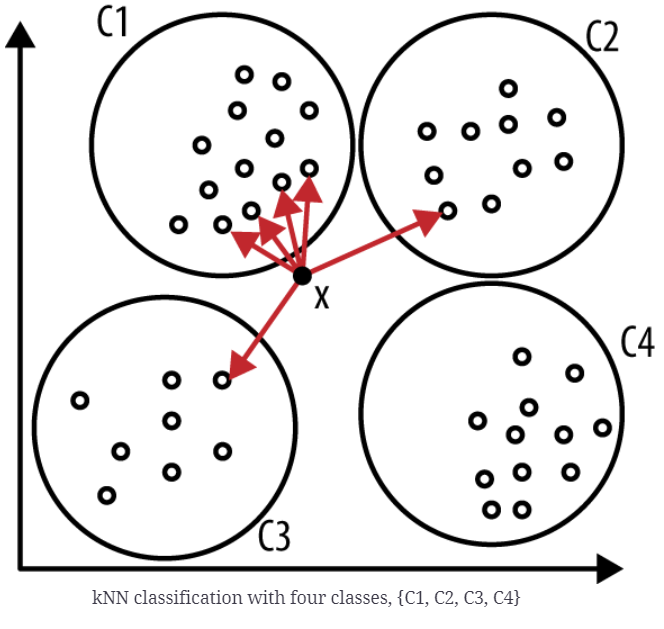

**Task:**

Use the 'diabetes.csv' dataset to **Classify** the patients based on the feature 'Outcome' by the KKN model.
0 means no diabetes and 1 means diabetes.

### Import the libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [6]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Exploratory Data Analysis

In [7]:
df. shape

(768, 9)

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Missing values

In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

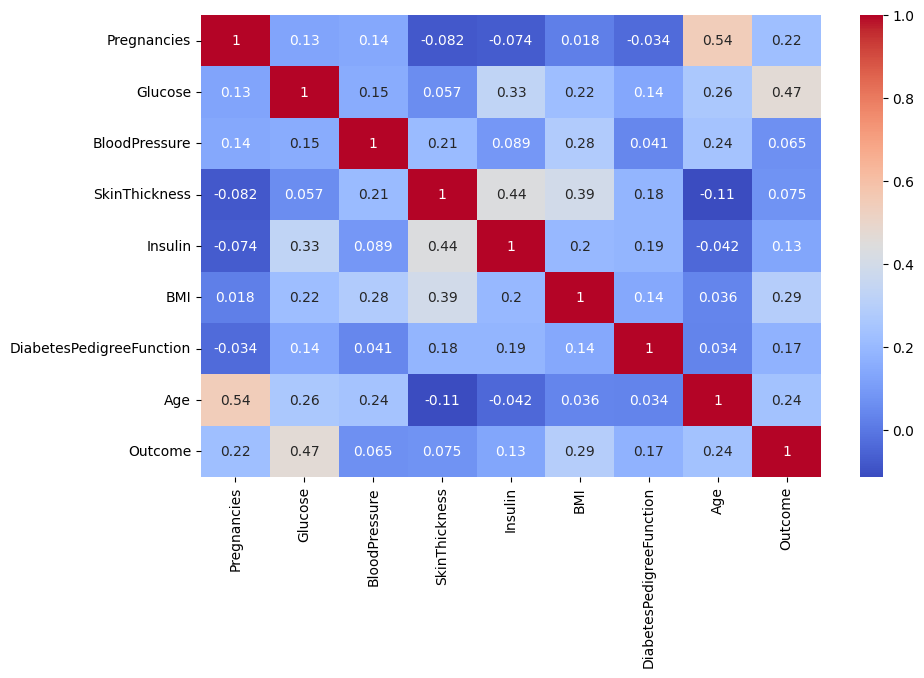

In [22]:
#correlation matrix
#df_cm = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
correlation = df.corr()
sns.heatmap(correlation, cmap="coolwarm", annot=True)
plt.show()

### create the independent and dependent variable

In [23]:
X = df.drop('Outcome', axis = 1).values
y = df['Outcome'].values


Split the data 

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=28,stratify=y)

### Training the model

In [30]:
from sklearn.neighbors import KNeighborsClassifier

#Declare arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy = np.empty(len(neighbors))
test_accuracy =np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    #declare and initialise KNN classifier model with k neighbors
    KNN = KNeighborsClassifier(n_neighbors = k)

    #call the mehod fit () to train the model
    KNN.fit(X_train,y_train)

    #compute accuracy on the training set
    train_accuracy[i] = KNN.score(X_train, y_train)

    #compute accuracy on the test set
    test_accuracy[i] = KNN.score(X_test, y_test)
    

Visualise the accurary based on the number of neighbors

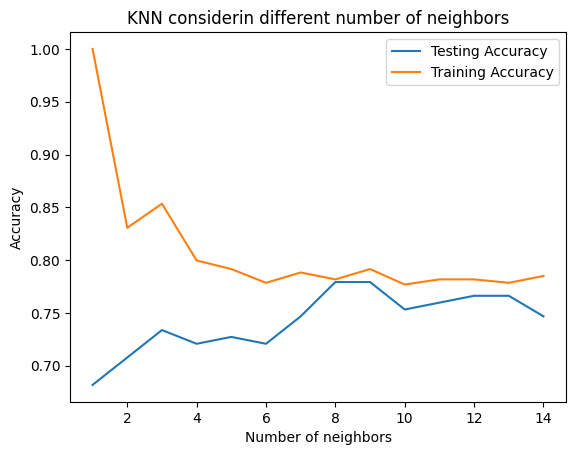

In [31]:
plt.title('KNN considerin different number of neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label= 'Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Here we observe that **8** neighbors is the optimum parameter in retationship with training and testing accuracy.

### Train the KNN model with 8 neighbors

In [41]:
# Declare and initialise KNN classifier with 8 neighbors
KNN_8 = KNeighborsClassifier(n_neighbors = 8)

# Call fit() method to train the model
KNN_8.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

### Predict results from X_test

In [45]:
y_pred = KNN_8.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

### Calcutale r2 score

In [42]:
KNN_8.score(X_test, y_test)

0.7792207792207793

### Confusion Matrix

In [46]:
# import library for confusion matrix
from sklearn.metrics import confusion_matrix

# display confusion matrix
confusion_matrix(y_test,y_pred)

array([[96,  4],
       [30, 24]])

Use Crosstab method to draw the consufion matrix

In [53]:
pd.crosstab(y_test, y_pred,rownames=['True'], colnames = ['Predicted'], margins = True )

Predicted,0,1,All
True,,,
0,96,4,100
1,30,24,54
All,126,28,154


### Classification Report

In [54]:
# import the library for classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       100
           1       0.86      0.44      0.59        54

    accuracy                           0.78       154
   macro avg       0.81      0.70      0.72       154
weighted avg       0.80      0.78      0.76       154

